In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import *

import pickle
import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# Exploratary Data Analysis(EDA)

In [91]:
data.shape

(1168, 81)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Information of the dataset

1. RangeIndex: 0 to 1167

2. Total Columns: 81 columns
3. dtypes: float64(3), int64(35), object(43)

In [93]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [94]:
#Checking if there are any null values
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

These are the columns with null values

In [95]:
#Dropping the columns having null values.
data.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)
data.shape

(1168, 78)

The above dropped columns contains 70% of null data

In [96]:
#Filling the Null Values
null = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence']

In [97]:
for i in null:
    print('\n',i)
    print(data[i].unique(),'\n ----------------------------------------')


 LotFrontage
[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.] 
 ----------------------------------------

 MasVnrType
['None' 'BrkFace' 'Stone' 'BrkCmn' nan] 
 ----------------------------------------

 MasVnrArea
[0.000e+00 4.800e+02 1.260e+02 1.800e+02 6.700e+01 2.230e+02 6.600e+01
 8.200e+01 1.740e+02 3.040e+02 1.720e+02 1.660e+02 1.840e+02 3.500e+02
 4.120e+02 1.000e+00 1.890e+02 1.120e+02 5.000e+01 2.200e+02 1.600e+01
 6.300e+02 2.810e+02 2.870e+02 3.400e+02 2.160e+02       nan 1.400e+02
 1.830

In [98]:
#Filling the values with mean,median and mode
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [99]:
def fill(x):
    data[x] = data[x].fillna(data[x].mode()[0])

In [100]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence']

In [101]:
for i in n:
    fill(i)
data.columns[data.isnull().any()]

Index([], dtype='object')

No null values is present in the dataset

# Encoding

In [102]:
#Filling the columns with Object Datatype
obj = []
for col in data:
    if data[col].dtype == 'object':
        obj.append(col)

In [103]:
for i in obj:
    print('\n',i)
    print(data[i].unique(),'\n ----------------------------------------')


 MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)'] 
 ----------------------------------------

 Street
['Pave' 'Grvl'] 
 ----------------------------------------

 LotShape
['IR1' 'Reg' 'IR2' 'IR3'] 
 ----------------------------------------

 LandContour
['Lvl' 'Bnk' 'HLS' 'Low'] 
 ----------------------------------------

 Utilities
['AllPub'] 
 ----------------------------------------

 LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3'] 
 ----------------------------------------

 LandSlope
['Gtl' 'Mod' 'Sev'] 
 ----------------------------------------

 Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste'] 
 ----------------------------------------

 Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn'] 
 ----------------------------------------

 Condition2
['No

In [104]:
data.drop('Utilities',axis = 1, inplace = True )

In [105]:
obj.remove('Utilities')

In [106]:
#Encoding every column which has Object datatypes
lb = LabelEncoder()
for i in obj:
    data[i] = lb.fit_transform(data[i])

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   LotShape       1168 non-null   int32  
 7   LandContour    1168 non-null   int32  
 8   LotConfig      1168 non-null   int32  
 9   LandSlope      1168 non-null   int32  
 10  Neighborhood   1168 non-null   int32  
 11  Condition1     1168 non-null   int32  
 12  Condition2     1168 non-null   int32  
 13  BldgType       1168 non-null   int32  
 14  HouseStyle     1168 non-null   int32  
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

No object datatypes present in the dataset

# Feature Selection

In [108]:
#Seperating the feature and target
x = data.drop('SalePrice',axis=1)
y = data.SalePrice

In [109]:
#Applying SelectKBest & F_Classifier
best_feature = SelectKBest(score_func = f_classif, k =60)
fit = best_feature.fit(x,y)

In [110]:
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [111]:
feature_score = pd.concat([column,score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(40,'Scores')

,Feature Name,Scores
15,OverallQual,5.303071
71,MiscVal,3.564855
25,ExterQual,3.514221
44,GrLivArea,2.977506
28,BsmtQual,2.876879
51,KitchenQual,2.617125
59,GarageCars,2.578547
47,FullBath,2.435854
60,GarageArea,2.316328
58,GarageFinish,2.187163


In [112]:
#Selecting top 40 features
top = data[['OverallQual','MiscVal','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
             'GarageArea','GarageFinish','YearBuilt','1stFlrSF','TotalBsmtSF','MasVnrArea','Street','LotArea',
             'YearRemodAdd','GarageYrBlt','Heating','TotRmsAbvGrd','MSZoning','Fireplaces','CentralAir',
             'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC','HalfBath',
             'Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl','MasVnrType',
             'GarageType','BedroomAbvGr','SalePrice']]

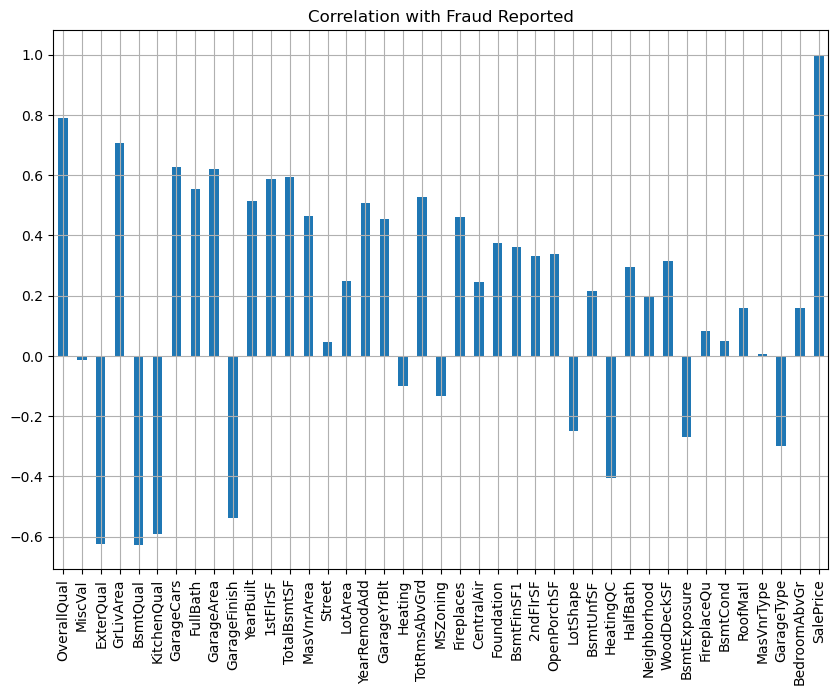

In [113]:
#Displaying top 40 features with respect to target
top.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Fraud Reported')
plt.show()

# Correlation

In [114]:
cor = top.corr()
mask = np.triu(np.ones_like(cor))

<AxesSubplot:>

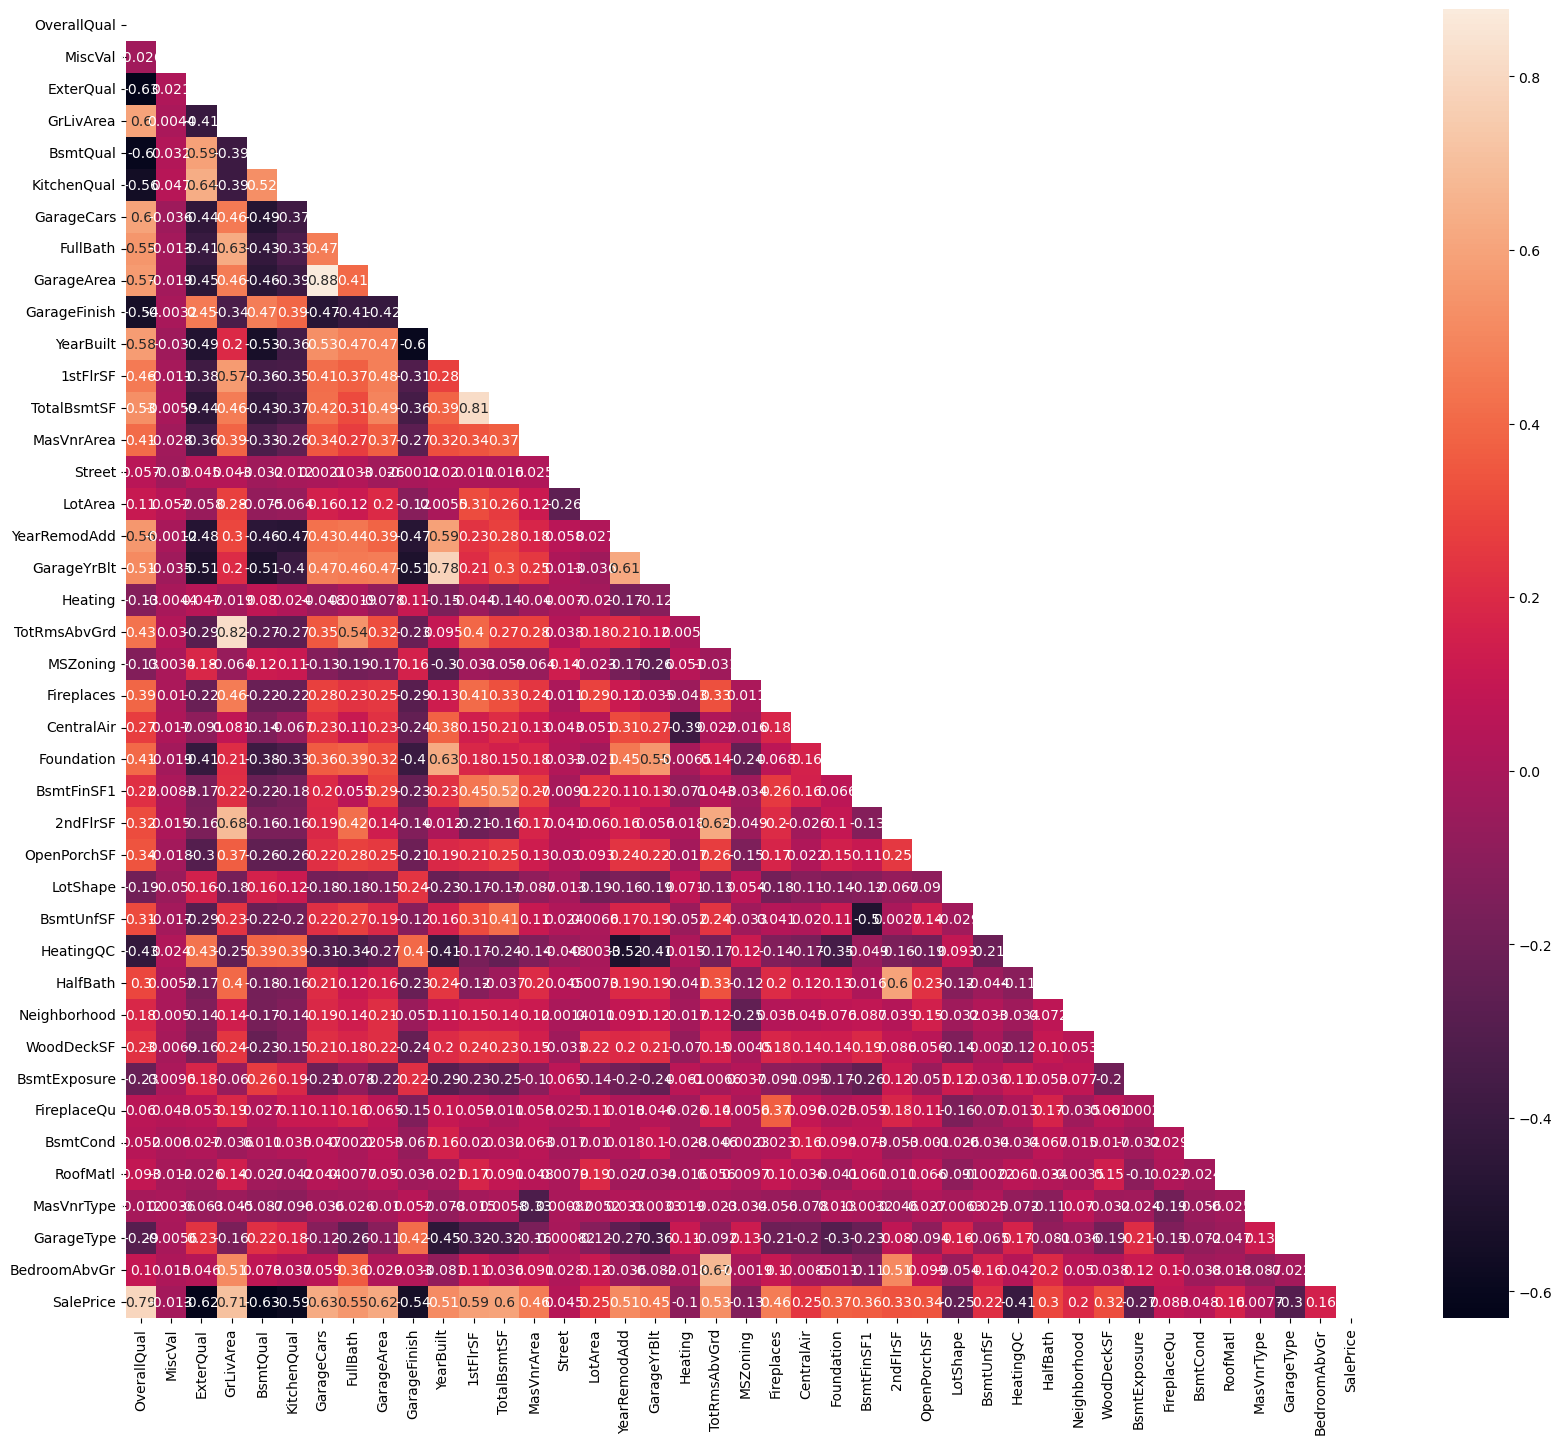

In [115]:
plt.figure(figsize = (20,17))
sns.heatmap(cor,annot = True,fmt = '.2g',mask = mask )

Dropping the columns whose correlation is more than 80%.

Found that:

1. TotRmsAbvGrd & GrLivArea, has the correlation of 82%.
2. GarageArea & GarageCars, has the correlation of 88%.
3. TotalBsmtSF & 1stFlrSF, has the correlation of 81%.

In [116]:
top.drop(columns = ['TotRmsAbvGrd','GarageArea','TotalBsmtSF'],axis = 1, inplace = True)

# Data Visualization

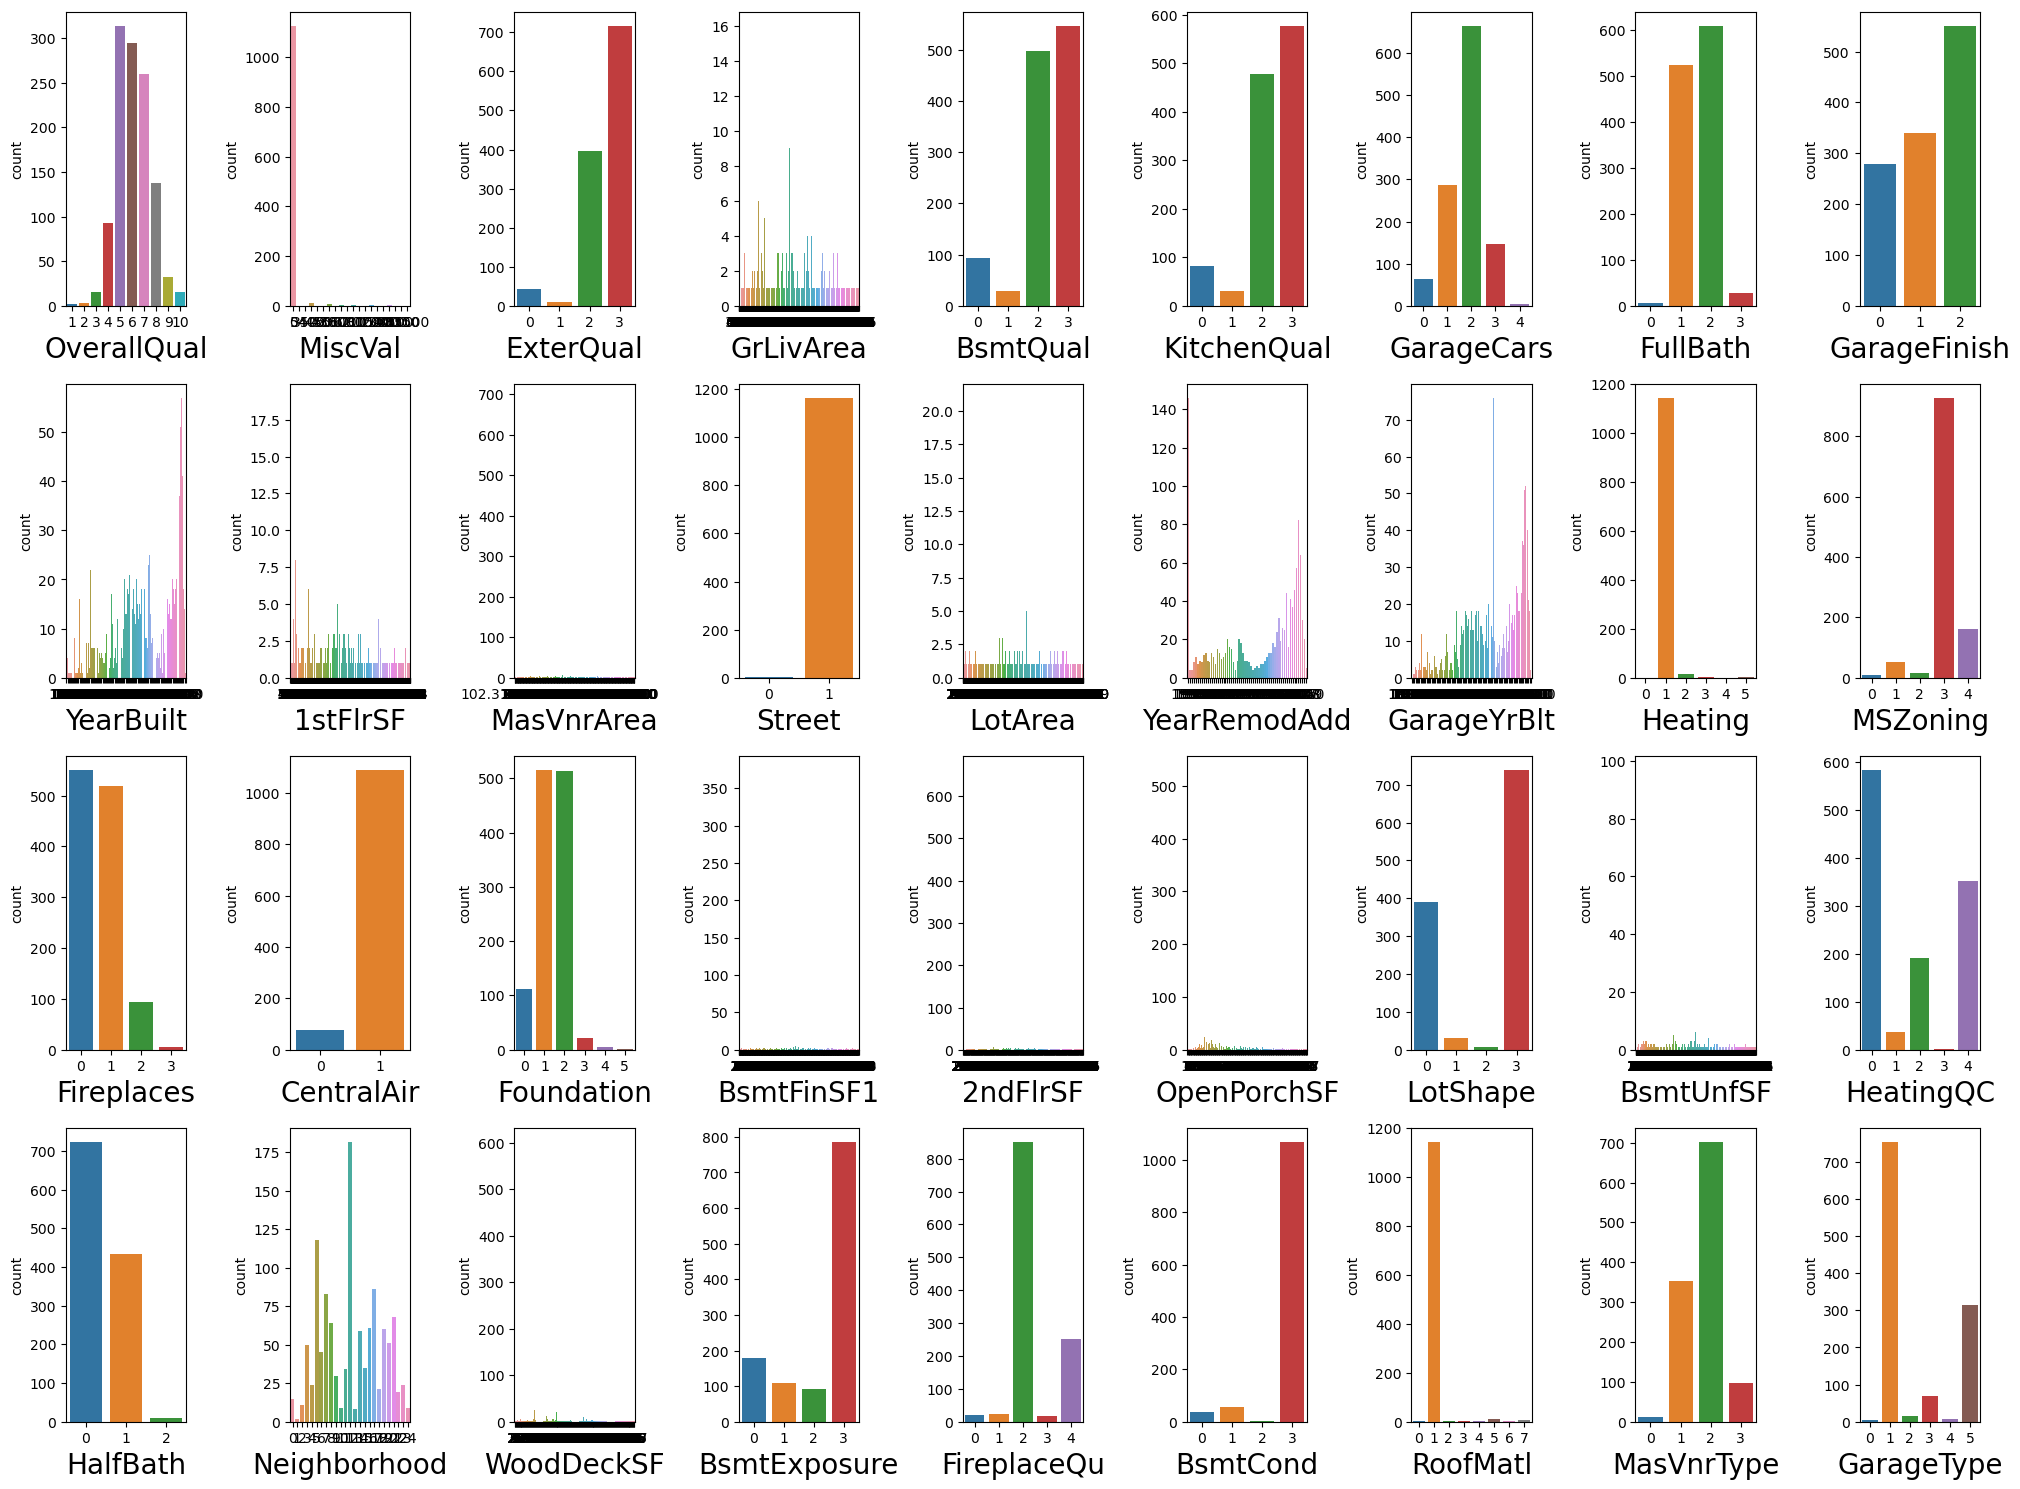

In [117]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.countplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

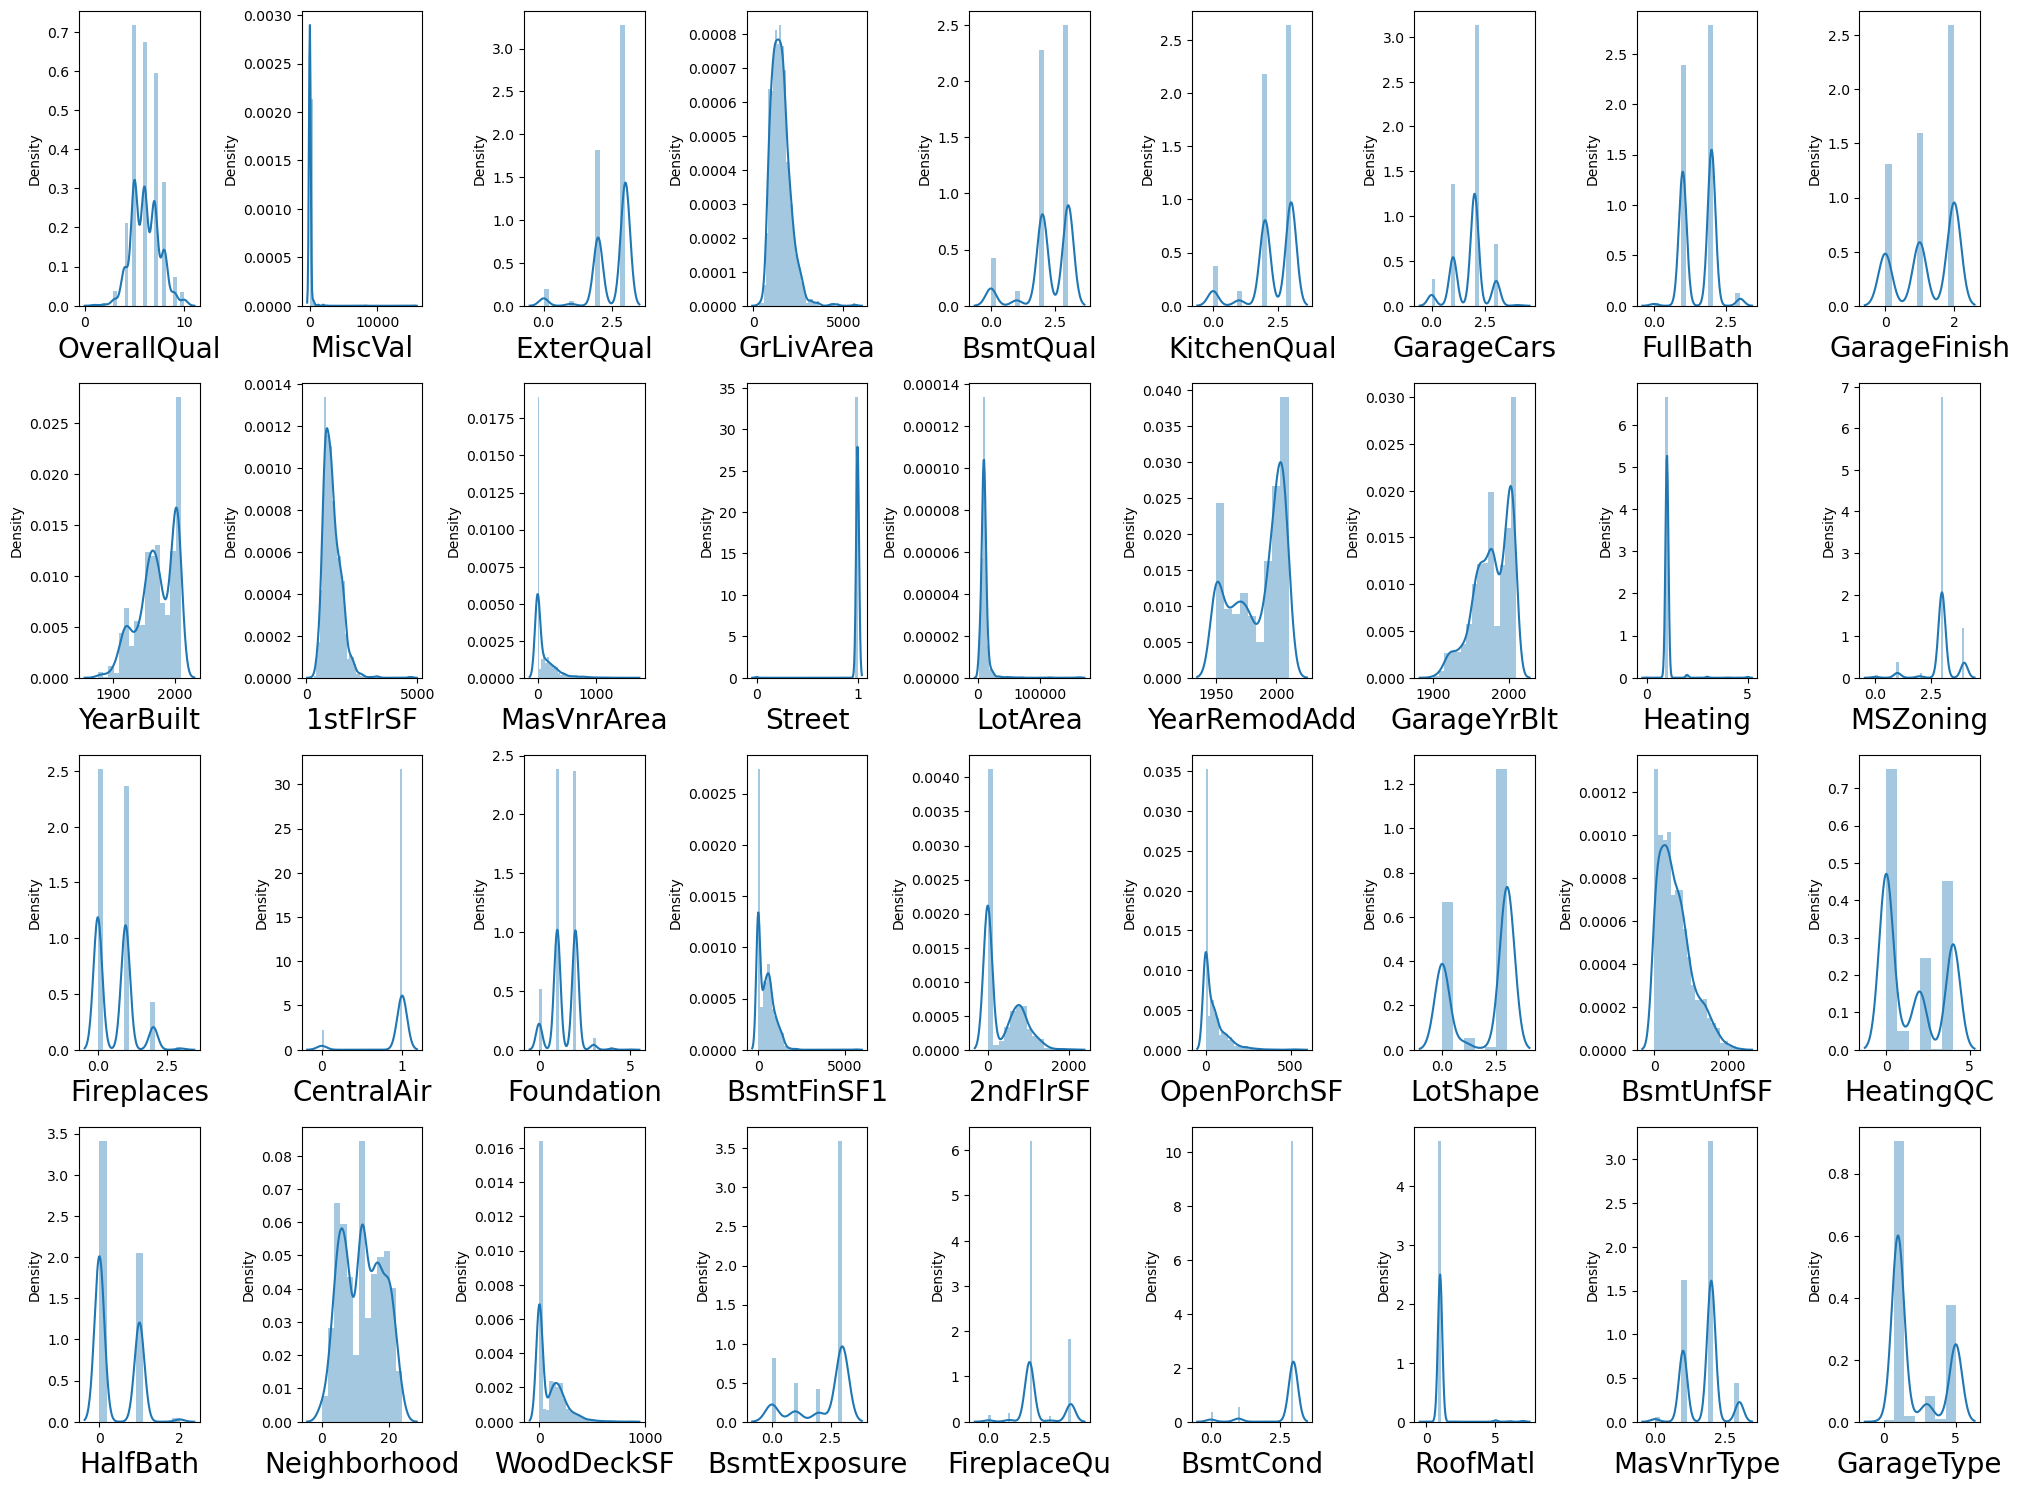

In [118]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in top:
    if plotnumber <= 36:
        ax = plt.subplot(4,9,plotnumber)
        sns.distplot(top[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

# Outliers

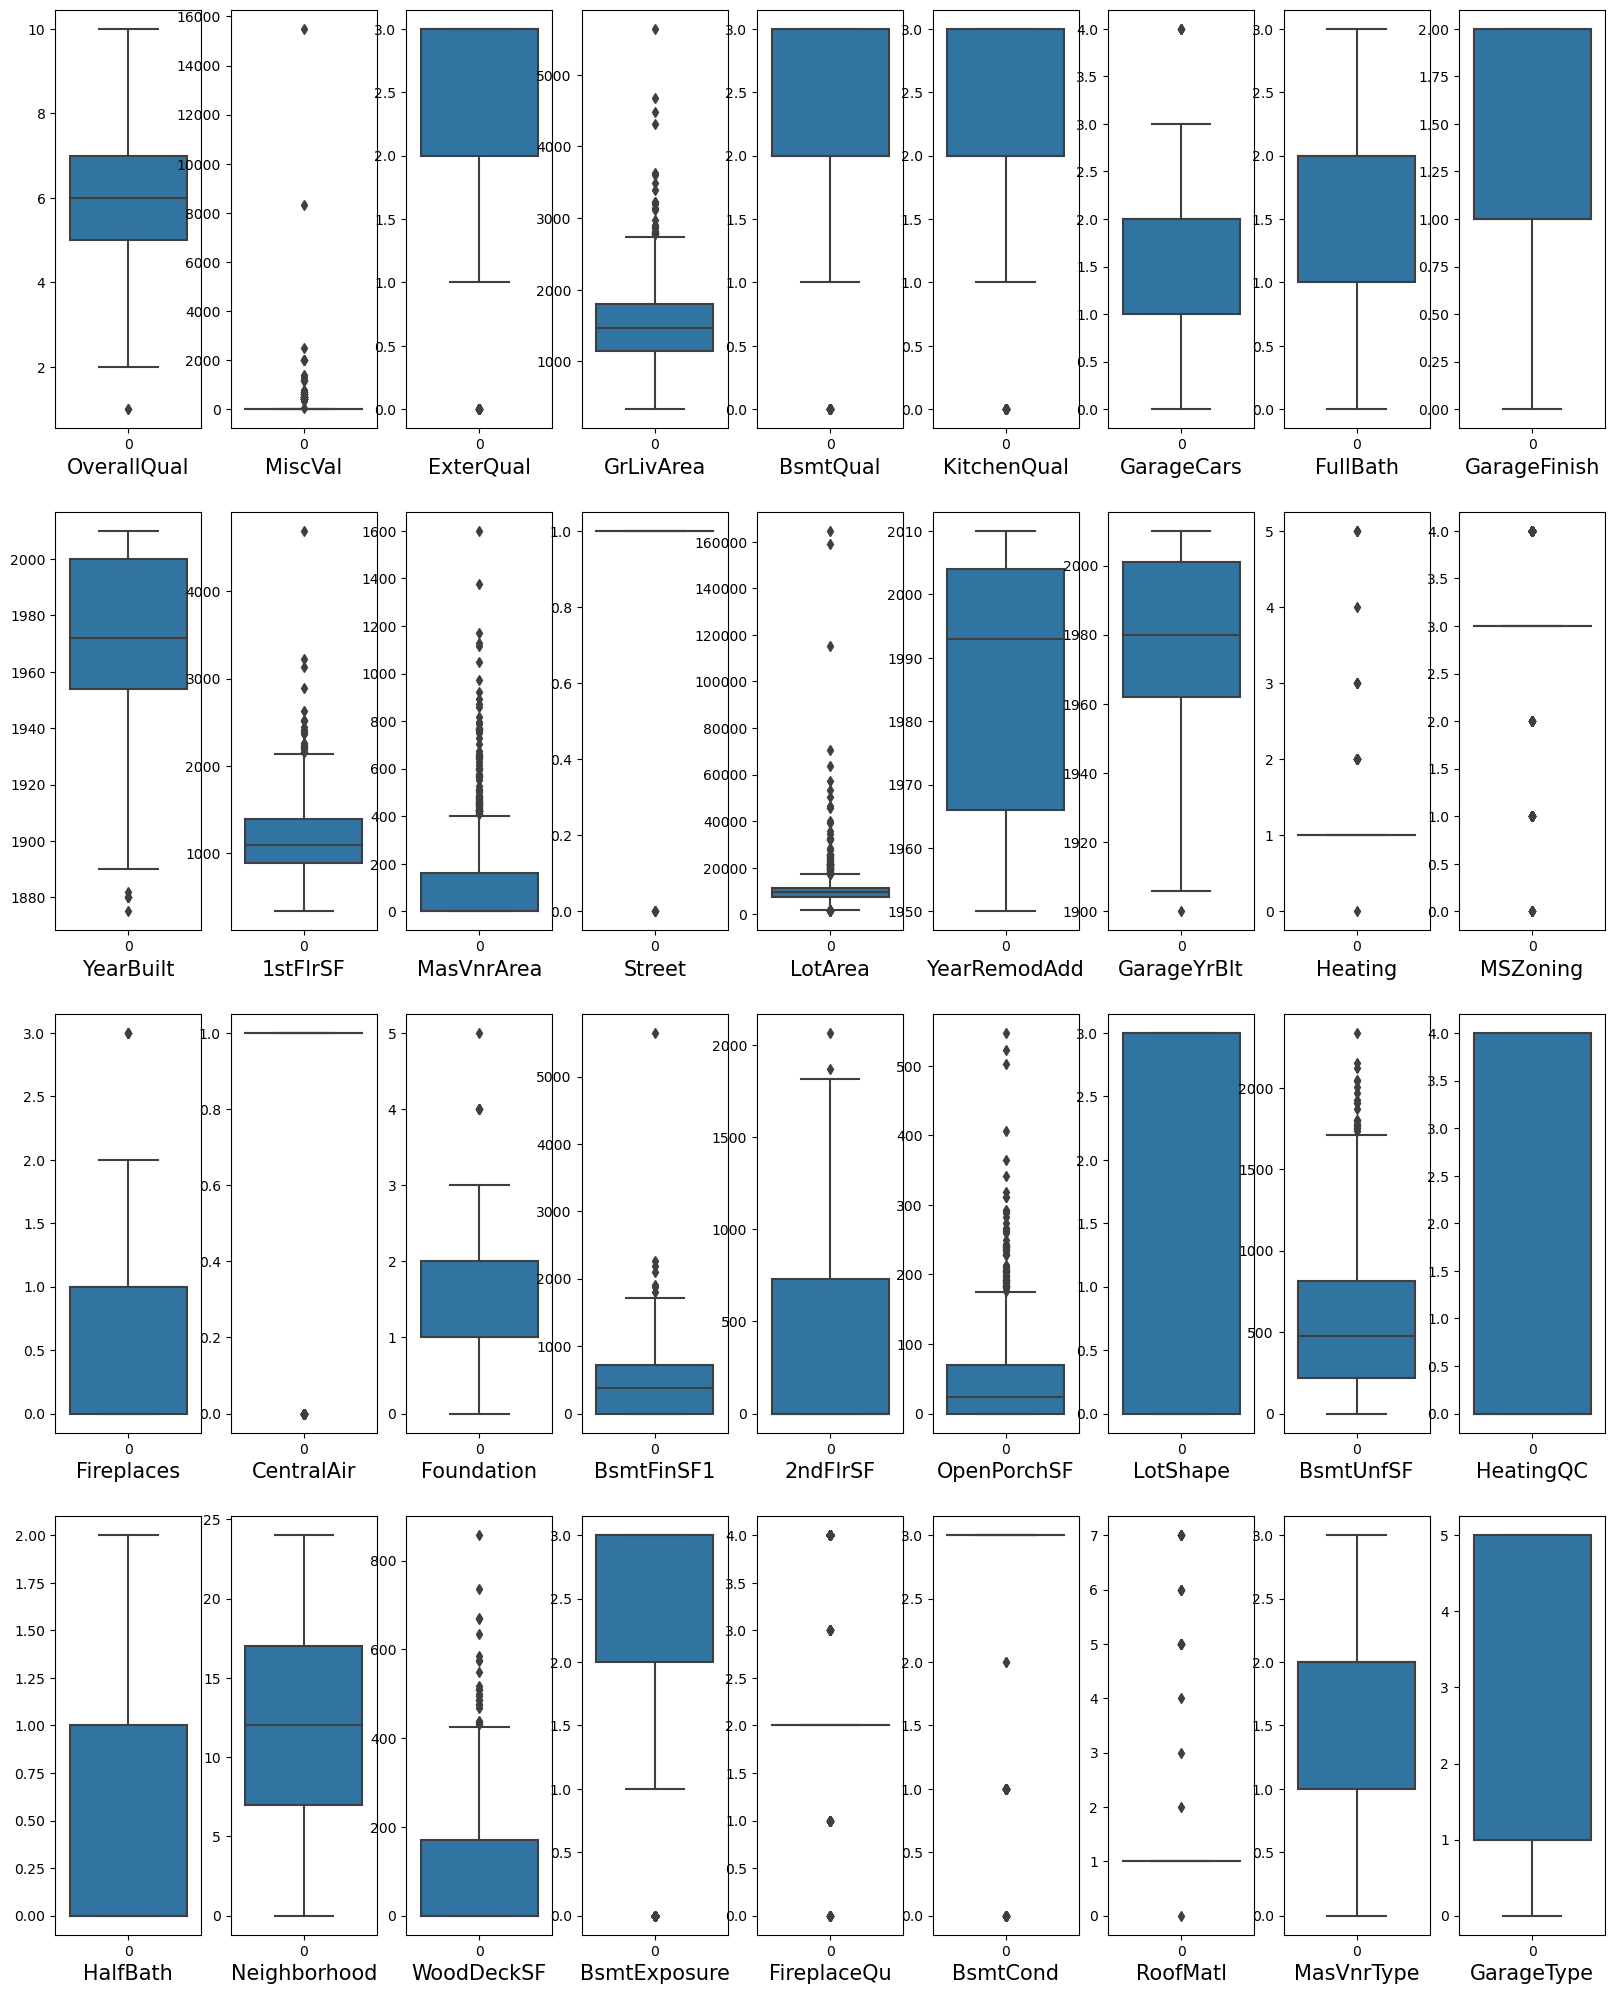

In [119]:
plt.figure(figsize = (20,25))
graph = 1
for column in top:
    if graph <= 36:
        plt.subplot(4,9,graph)
        ax = sns.boxplot(data = top[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

From the above graph plots outliers can be observed. 

# Removing Outliers

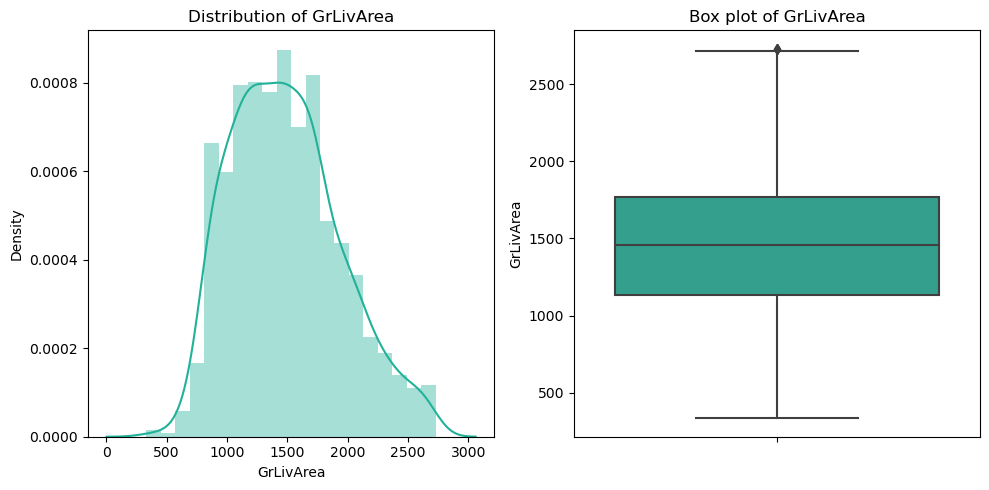

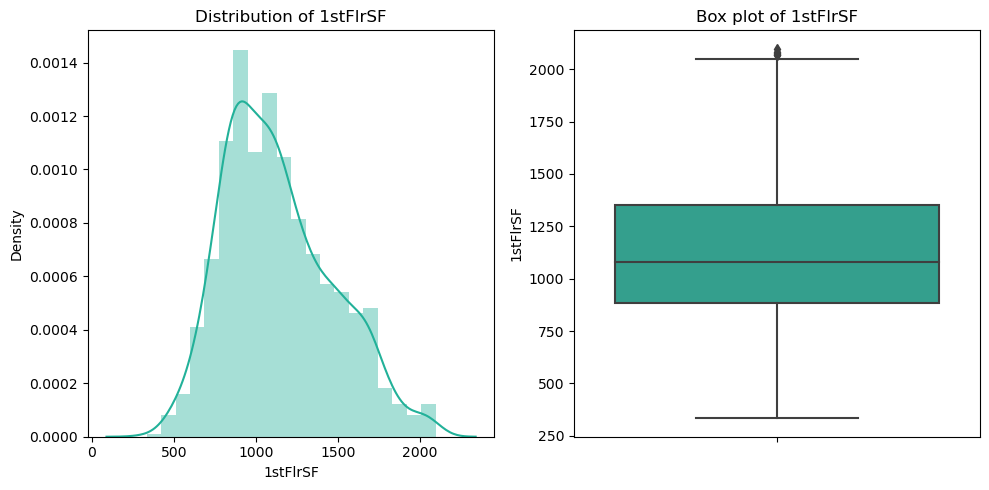

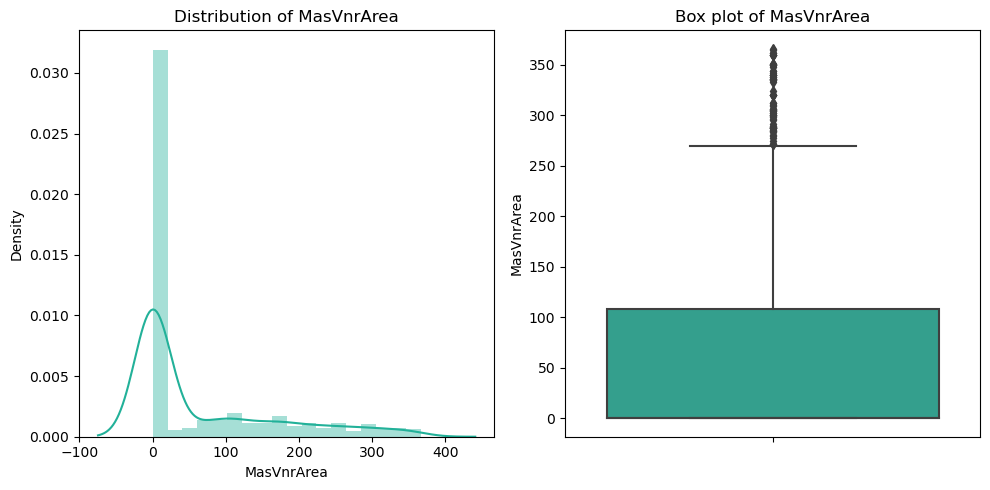

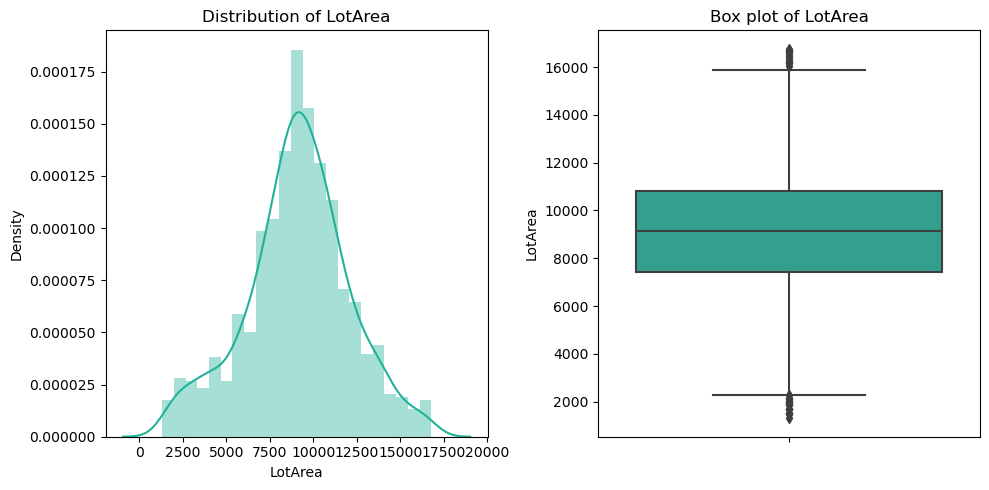

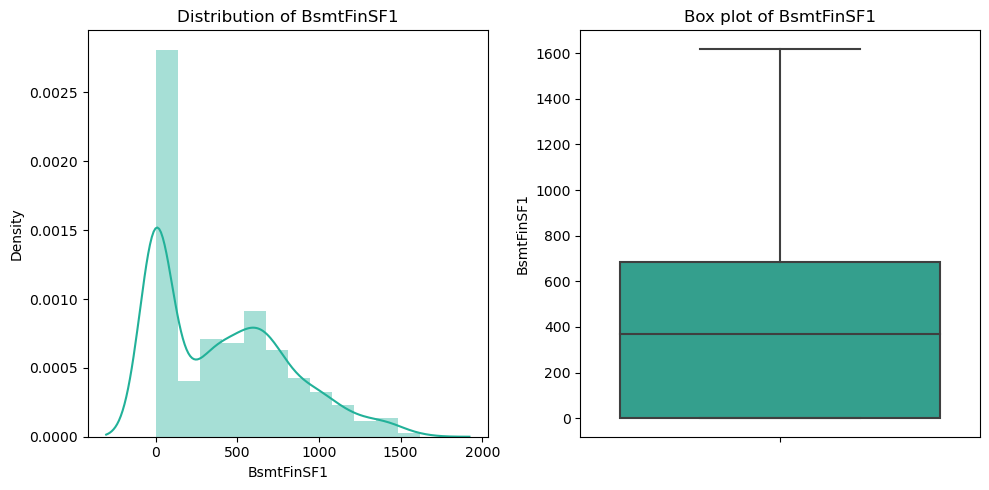

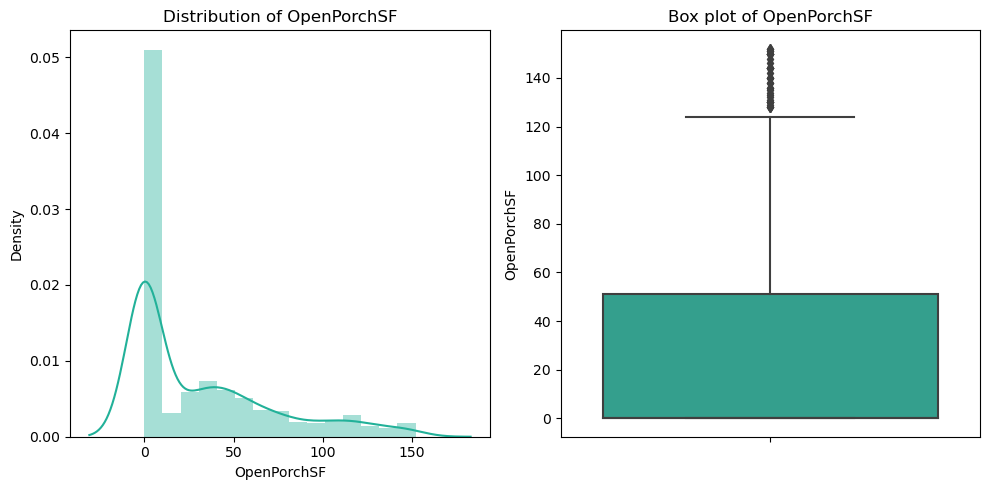

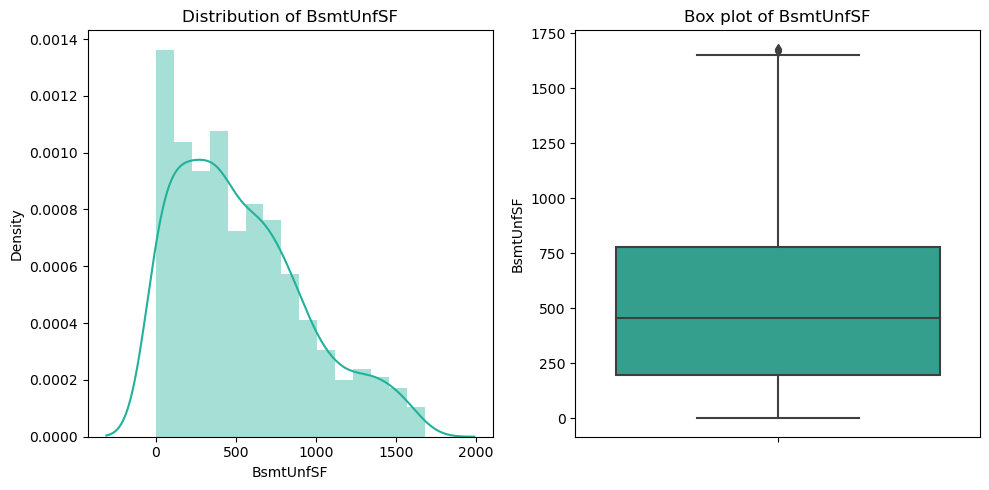

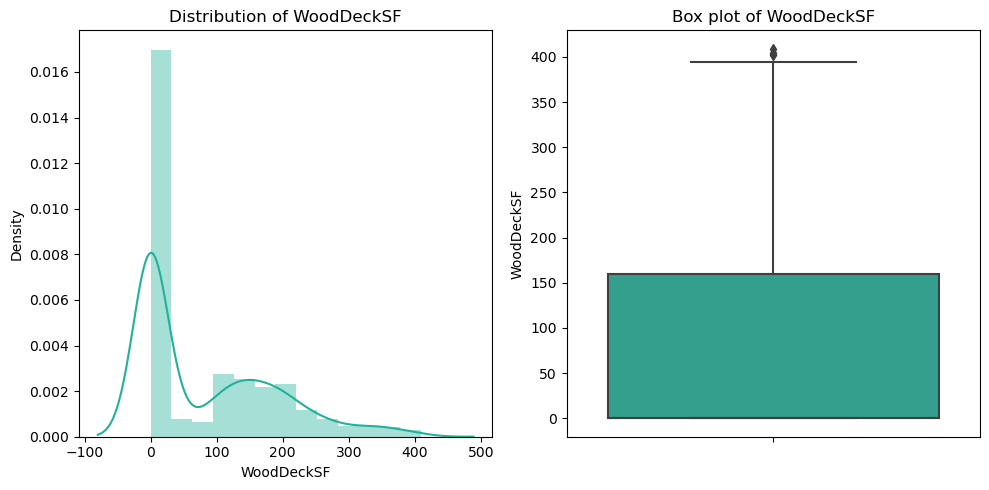

(923, 38)


In [120]:
def remove_outliers(x):
    global top
    Q1= top[x].quantile(0.25)
    Q3 = top[x].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    
    index = np.where(top[x] > upper_limit)
    top = top.drop(top.index[index])
    top.reset_index()
        
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(top[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=top[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of '+ x )
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['GrLivArea','1stFlrSF','MasVnrArea','LotArea','BsmtFinSF1','OpenPorchSF','BsmtUnfSF','WoodDeckSF']:
    remove_outliers(i)
print(top.shape)

The final dataset is free from outliers and is normally dsitributed

# Model Building

In [121]:
#Seperating the Features & Target of Top Features
x_top = top.drop('SalePrice',axis = 1)
y_top = top.SalePrice

In [122]:
#Scaling the Features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_top)

In [123]:
#Splitting the data in Train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_top,test_size=0.30,random_state=90)

In [124]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evalution ----- \n')
        print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
        print('\n Scatter Plot \n')
        plt.scatter(y_test, pred)
        plt.xlabel("Actual Sales")
        plt.ylabel("Predicted Sales")
        plt.title("Actual VS Prediction")
        plt.show()


 ----- Train Result ----- 

R2 Score: 0.871767283572215

 ----- Test Result ----- 

R2 Score: 0.8930274858295716

 ----- Model Evalution ----- 

Mean Absolute Error: 15397.440912837083

 Scatter Plot 



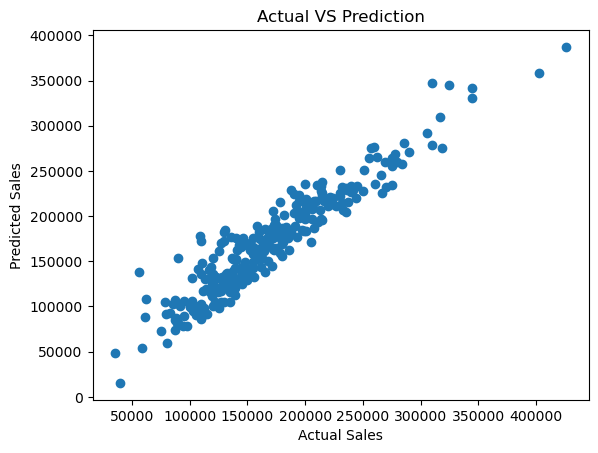

In [125]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.97941791830724

 ----- Test Result ----- 

R2 Score: 0.891449781628172

 ----- Model Evalution ----- 

Mean Absolute Error: 15053.377087845967

 Scatter Plot 



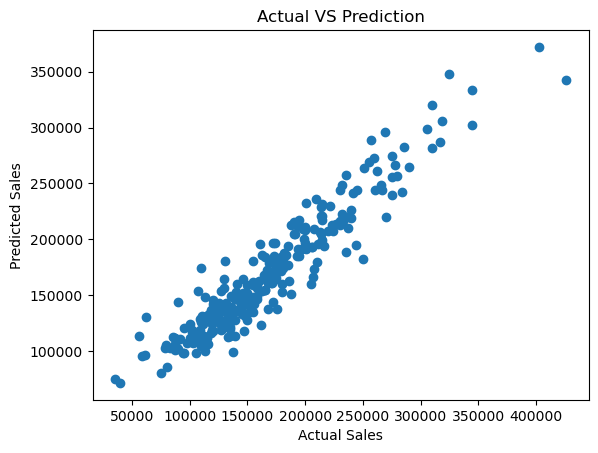

In [126]:
#Random Forest Regression
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.8935248570246268

 ----- Test Result ----- 

R2 Score: 0.8660535440264989

 ----- Model Evalution ----- 

Mean Absolute Error: 17332.285954183928

 Scatter Plot 



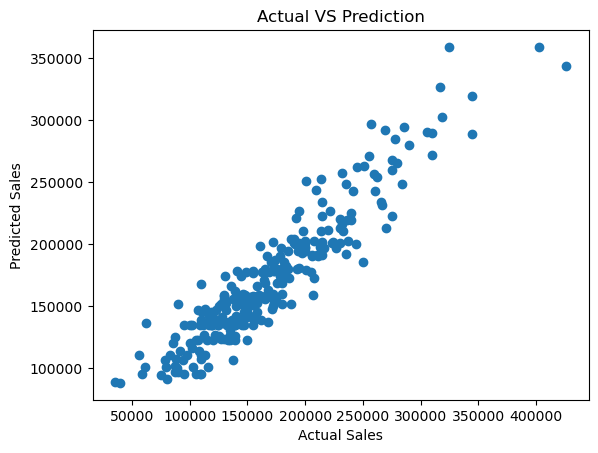

In [127]:
#AdaBoost Regressoion.
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9640870302197488

 ----- Test Result ----- 

R2 Score: 0.9115162481336869

 ----- Model Evalution ----- 

Mean Absolute Error: 13490.874514545889

 Scatter Plot 



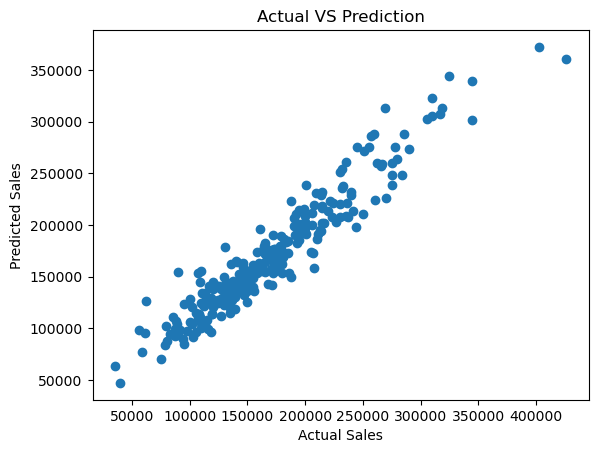

In [128]:
#Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
score(gb, x_train,x_test,y_train,y_test,train = True)
score(gb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9857875838059553

 ----- Test Result ----- 

R2 Score: 0.893063688974053

 ----- Model Evalution ----- 

Mean Absolute Error: 14770.298355133407

 Scatter Plot 



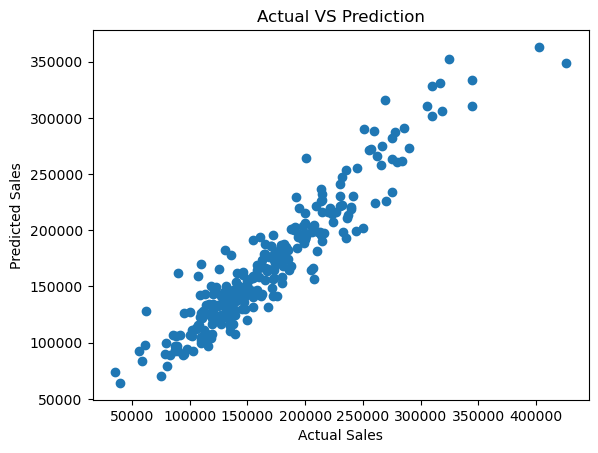

In [129]:
#Hist Gradient Boosting Regression
hgb = HistGradientBoostingRegressor()
hgb.fit(x_train,y_train)
score(hgb, x_train,x_test,y_train,y_test,train = True)
score(hgb, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.875401286313048

 ----- Test Result ----- 

R2 Score: 0.8328938374219663

 ----- Model Evalution ----- 

Mean Absolute Error: 17973.372563176894

 Scatter Plot 



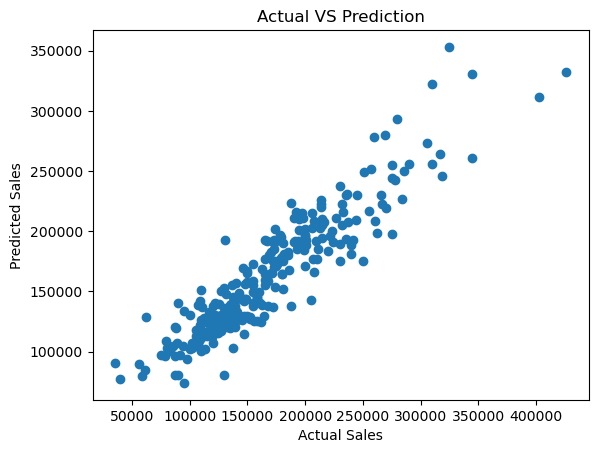

In [130]:
#KNN Regression
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)

From the above all the displayed models GradientBoosting Regressor is having the best score. 

# Hyperparameter Tuning

In [131]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
param = {'n_estimators':range(0,100,10),
         'learning_rate':[0.1,0.3,0.5,0.7,0.8,1,2,3,4],
         'criterion':['friedman_mse', 'squared_error'],
         'loss':['squared_error', 'absolute_error'],
         'random_state':range(1,10),
         'max_features':['auto', 'sqrt']}

In [46]:
grid = GridSearchCV(gb,param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 90,
 'random_state': 5}

In [132]:
gbr = GradientBoostingRegressor(criterion = 'friedman_mse',learning_rate =  0.1,loss = 'squared_error',
                                   max_features = 'sqrt',n_estimators = 90,random_state = 2)


 ----- Train Result ----- 

R2 Score: 0.9495593821450734

 ----- Test Result ----- 

R2 Score: 0.9094165587217411

 ----- Model Evalution ----- 

Mean Absolute Error: 13918.679856450226

 Scatter Plot 



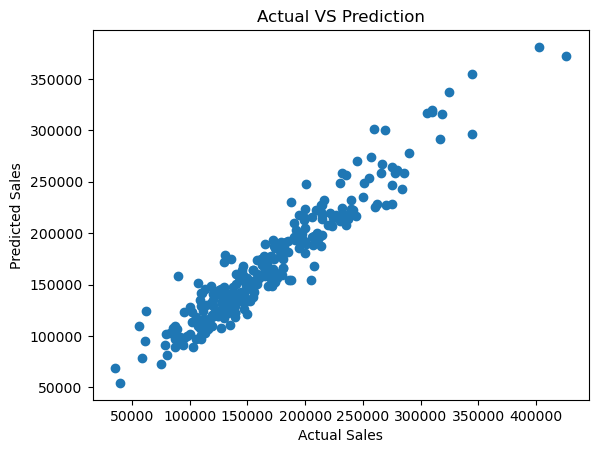

In [133]:
gbr.fit(x_train,y_train)
score(gbr, x_train,x_test,y_train,y_test,train = True)
score(gbr, x_train,x_test,y_train,y_test,train = False)

In [134]:
#Testing Dataset
test_data=pd.read_csv('test (1).csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [135]:
test_data.columns[test_data.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [136]:
test_data.drop(columns = ['MiscFeature','PoolQC','Alley'],axis = 1, inplace = True)

In [137]:
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())

In [138]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].median())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median())

In [139]:
def fill(x):
    test_data[x] = test_data[x].fillna(test_data[x].mode()[0])

In [140]:
n = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
'GarageFinish','GarageQual','GarageCond','Fence','Electrical']

In [141]:
for i in n:
    fill(i)

In [142]:
test_data.columns[test_data.isnull().any()]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

In [143]:
test_data.drop('Utilities',axis = 1, inplace = True )

In [144]:
obj_test = []
for col in test_data:
    if test_data[col].dtype == 'object':
        obj_test.append(col)

In [145]:
lb = LabelEncoder()
for i in obj_test:
    test_data[i] = lb.fit_transform(test_data[i])

In [146]:
top_test = test_data[['OverallQual','ExterQual','GrLivArea','BsmtQual','KitchenQual','GarageCars','FullBath',
                       'GarageFinish','YearBuilt','1stFlrSF','MasVnrArea','Street','LotArea',
                       'YearRemodAdd','GarageYrBlt','Heating','MSZoning','Fireplaces','CentralAir',
                       'Foundation','BsmtFinSF1','2ndFlrSF','OpenPorchSF','LotShape','BsmtUnfSF','HeatingQC',
                       'HalfBath','Neighborhood','WoodDeckSF','BsmtExposure','FireplaceQu','BsmtCond','RoofMatl',
                       'GarageType','BedroomAbvGr']]

In [147]:
'TotRmsAbvGrd','GarageArea','TotalBsmtSF'

('TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF')

In [148]:
top_test

,OverallQual,ExterQual,GrLivArea,BsmtQual,KitchenQual,GarageCars,FullBath,GarageFinish,YearBuilt,1stFlrSF,...,HeatingQC,HalfBath,Neighborhood,WoodDeckSF,BsmtExposure,FireplaceQu,BsmtCond,RoofMatl,GarageType,BedroomAbvGr
0,5,3,896,3,3,1.0,1,2,1961,896,...,4,0,12,140,3,2,3,0,1,2
1,6,3,1329,3,2,1.0,1,2,1958,1329,...,4,1,12,393,3,2,3,0,1,3
2,5,3,1629,2,3,2.0,2,0,1997,928,...,2,1,8,212,3,4,3,0,1,3
3,6,3,1604,3,2,2.0,2,0,1998,926,...,0,1,8,360,3,2,3,0,1,3
4,8,2,1280,2,2,2.0,2,1,1992,1280,...,0,0,22,0,3,2,3,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,3,1092,3,3,0.0,1,2,1970,546,...,2,1,10,0,3,2,3,0,1,3
1455,4,3,1092,3,3,1.0,1,2,1970,546,...,4,1,10,0,3,2,3,0,4,3
1456,5,3,1224,3,3,2.0,1,2,1960,1224,...,0,0,11,474,3,4,3,0,5,4
1457,5,3,970,2,3,0.0,1,2,1992,970,...,4,0,11,80,0,2,3,0,1,3


# Saving The Model

In [153]:
filename = 'House.pickle'
pickle.dump(gbr, open(filename, 'wb'))